In [12]:
#Getting the csv file into a pandas dataframe
import pandas as pd

file_path = 'mlb_games_stats.csv'

df = pd.read_csv(file_path)

df


,date,home_team,away_team,home_score,away_score,result_home,result_away,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
0,2025-03-18,Chicago Cubs,Los Angeles Dodgers,1,4,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2025-03-19,Chicago Cubs,Los Angeles Dodgers,3,6,0,1,0.000000,1.000000,0.290000,3.000000,1.667000,0.622000,1.000000,0.444000
2,2025-03-27,Seattle Mariners,Athletics,4,2,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2025-03-27,Arizona Diamondbacks,Chicago Cubs,6,10,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2025-03-27,Los Angeles Dodgers,Detroit Tigers,5,4,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2025-07-25,Baltimore Orioles,Colorado Rockies,5,6,0,1,0.468085,0.240000,0.731234,5.134043,1.409447,0.587220,5.127100,1.487200
1556,2025-07-25,Milwaukee Brewers,Miami Marlins,1,5,0,1,0.660000,0.500000,0.665400,3.073260,1.145280,0.717167,5.159313,1.416583
1557,2025-07-25,Detroit Tigers,Toronto Blue Jays,2,6,0,1,0.627451,0.489796,0.751588,3.633863,1.187569,0.668082,4.300041,1.304224
1558,2025-07-26,New York Yankees,Philadelphia Phillies,4,9,0,1,0.600000,0.509804,0.774180,3.669880,1.200260,0.671863,3.436725,1.256725


In [13]:
# Splitting the data into x and y
# the y is the results of the games, and the x is the rest of the data

y = df[['result_home', 'result_away']]
y

,result_home,result_away
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1555,0,1
1556,0,1
1557,0,1
1558,0,1


In [14]:
# getting the x data

x = df.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'away_score', 'result_home', 'result_away'], axis=1)
x

,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.290000,3.000000,1.667000,0.622000,1.000000,0.444000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1555,0.468085,0.240000,0.731234,5.134043,1.409447,0.587220,5.127100,1.487200
1556,0.660000,0.500000,0.665400,3.073260,1.145280,0.717167,5.159313,1.416583
1557,0.627451,0.489796,0.751588,3.633863,1.187569,0.668082,4.300041,1.304224
1558,0.600000,0.509804,0.774180,3.669880,1.200260,0.671863,3.436725,1.256725


In [15]:
 # Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train #checking if the split worked

,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
845,0.600000,0.448276,0.602700,2.633333,1.088867,0.685414,4.387310,1.369379
1214,0.475000,0.600000,0.612025,3.346375,1.175525,0.662600,3.332833,1.158200
1550,0.600000,0.444444,0.742420,3.892360,1.219040,0.654074,4.375500,1.363778
774,0.680000,0.520000,0.776680,3.133080,1.084080,0.739440,5.031440,1.355800
1259,0.688889,0.558140,0.738733,3.397778,1.131333,0.784047,4.081000,1.300488
...,...,...,...,...,...,...,...,...
1130,0.394737,0.333333,0.669447,4.483500,1.337053,0.669778,4.185806,1.244000
1294,0.400000,0.560976,0.674675,4.935900,1.374500,0.720805,4.122707,1.279707
860,0.615385,0.413793,0.723885,3.045115,1.179077,0.714000,4.217483,1.253034
1459,0.652174,0.469388,0.771739,4.002957,1.249652,0.687429,4.830082,1.487143


In [16]:
# Building the model with Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train['result_home'])  # Training on home results


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
#test the model with the test set
lr_model.predict(x_test)  # Making predictions on the test set

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# checking the accuracy of the model 
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test['result_home'], y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')  # Displaying accuracy as a percentage

Accuracy of the model: 55.45%


In [19]:
# building the model with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=5, min_samples_leaf=1)
rf_model.fit(x_train, y_train['result_home'])

,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# run 5-fold cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    rf_model,
    x_train,
    y_train['result_home'],
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
print("CV AUC scores:", scores)
print("Mean AUC:", scores.mean())

CV AUC scores: [0.53501066 0.55335573 0.57878612 0.5967595  0.51470588]
Mean AUC: 0.5557235773849485


In [21]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':    [100, 200, 500],
    'max_depth':       [None, 3, 5, 10],
    'min_samples_leaf':[1, 2, 5]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(x_train, y_train['result_home'])

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

best_rf = grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
Best CV AUC: 0.5649220883534136


In [22]:
# testing/predicting the Random Forest model
rf_model.predict(x_test)  # Making predictions on the test set

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [23]:
#checking the accuracy of the Random Forest model

rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test['result_home'], rf_y_pred)
print(f'Accuracy of the Random Forest model: {rf_accuracy * 100:.2f}%')

Accuracy of the Random Forest model: 58.01%


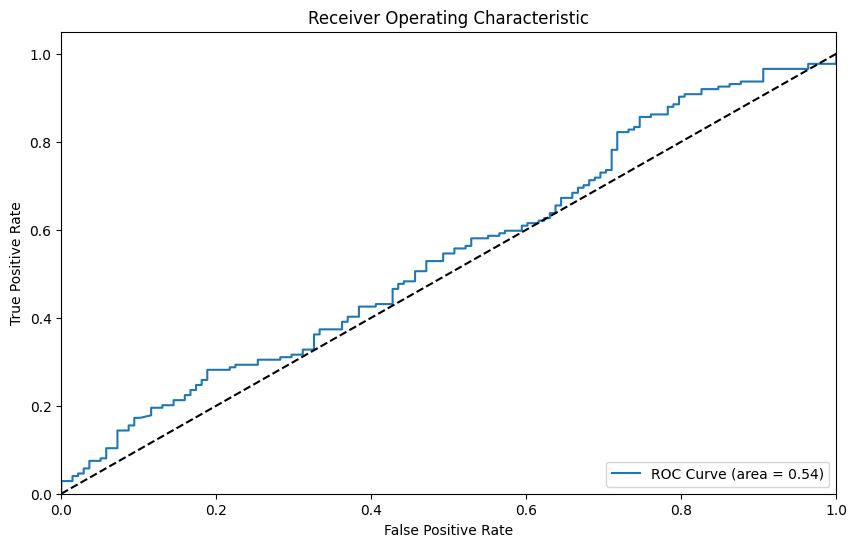

In [24]:
# data visualization of the results
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test['result_home']
y_prob = rf_model.predict_proba(x_test)[:, 1]  # Get probabilities

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

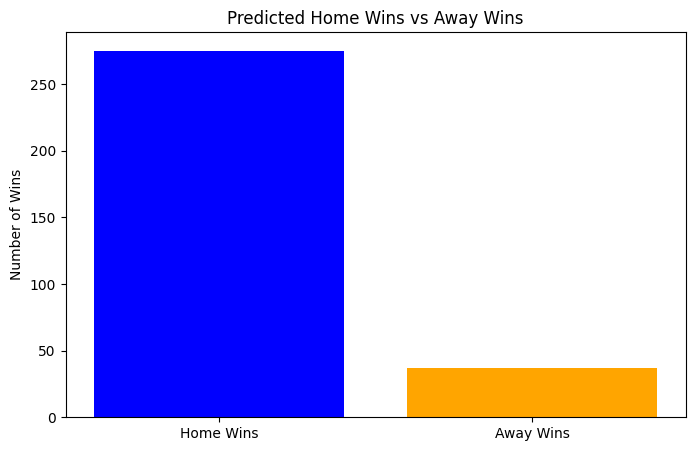

In [27]:
# bar graph of predicted home wins vs predicted away wins
home_wins = (y_pred == 1).sum()
away_wins = (y_pred == 0).sum()
plt.figure(figsize=(8, 5))
plt.bar(['Home Wins', 'Away Wins'], [home_wins, away_wins], color=['blue', 'orange'])
plt.title('Predicted Home Wins vs Away Wins')
plt.ylabel('Number of Wins')
plt.show()

